# Problem Statement

Banknotes are one of the most important assets of a country.Some miscreants introduce fake notes which bear a resemblance to original note to create discrepancies of the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features. 
Hence, there is a need to build a predictive model for authenticating bank notes whether they are genuine or not.

## About the dataset

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

## Data Description

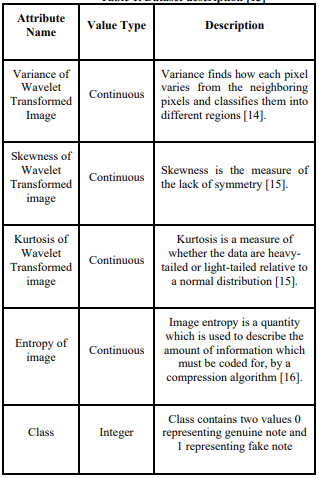

## Python Code

In [25]:
##Dataset Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset

df=pd.read_csv('BankNote_Authentication.csv')

In [3]:
#check the first five rows of the dataset

df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
#shape of dataset

df.shape

(1372, 5)

In [6]:
#check for missing values

df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

This implies that there are **no missing values** in the dataset.

In [11]:
# distinct values of class

df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [7]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [13]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [15]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

C:\Users\Destiny\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
## Prediction
y_pred=classifier.predict(X_test)

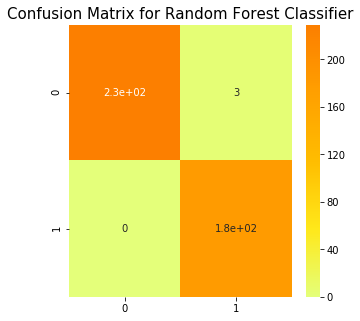

In [40]:
#evaluate model performance

from sklearn.metrics import confusion_matrix

#print the confusin matrix

plt.rcParams['figure.figsize']=(5,5)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot= True, cmap='Wistia')
plt.title('Confusion Matrix for Random Forest Classifier', fontsize = 15)
plt.show()


In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))

confusion_matrix.index = ['Actual Genuine','Actual Fake']
confusion_matrix.columns = ['Predicted Genuine','Predicted Fake']
print(confusion_matrix)

                Predicted Genuine  Predicted Fake
Actual Genuine                229               3
Actual Fake                     0             180


In [29]:
#print the classification report
from sklearn.metrics import classification_report

cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       232
           1       0.98      1.00      0.99       180

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



Precison and Recall values very good and almost equal to **1.00** which implies that model is very **accurate**.

In [43]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print("Accuracy of the given model is : {0:.4f}".format(score))

Accuracy of the given model is : 0.9927


Accuracy of the predictive model is **99.27%**.

In [21]:
#prediction on one unseen data

classifier.predict([[2,3,4,1]])

array([0], dtype=int64)

This implies that a note with the above mentioned values is **Genuine**.

## Conclusion

Hence, with this predictivemodel we can clearly authenticate if a banknote is genuine or fake.